In [43]:
#Importing necessary packages

%pip install MediPlot --upgrade
from MediPlot import BodyMap
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.


In [44]:
#Loading the original data fom NEISS
data = pd.read_csv('data_sports.csv', on_bad_lines='skip', sep = ';')
data.head()

,CPSC Case Number,Treatment Date,Age (in years),Age (in months),Sex code,Sex,Race code,Race,Other Race,Body Part code,...,Product 1,Product 2 code,Product 2,Narrative_1,Narrative_2,Stratum,PSU,Weight,Filename,Product Title
0,151225629,2015-12-12,75.0,NaN,1.0,Male,0.0,Not stated,NaN,75.0,...,Floors or flooring materials,0.0,Floors or flooring materials,NaN,NaN,V,21.0,16.5650,neiss2015,Floors or flooring materials
1,151225682,2015-12-02,32.0,NaN,1.0,Male,1.0,White,NaN,82.0,...,"Windows and window glass, other than storm win...",0.0,"Windows and window glass, other than storm win...",NaN,NaN,M,24.0,97.9239,neiss2015,"Windows and window glass, other than storm win..."
2,151225683,2015-12-02,4.0,NaN,2.0,Female,0.0,Not stated,NaN,76.0,...,Bathtubs or showers (including fixtures or acc...,0.0,Bathtubs or showers (including fixtures or acc...,NaN,NaN,M,24.0,97.9239,neiss2015,Bathtubs or showers (including fixtures or acc...
3,151225895,2015-11-26,32.0,NaN,1.0,Male,3.0,Other,HISPANIC,93.0,...,"Bags, not elsewhere classified",0.0,"Bags, not elsewhere classified",NaN,NaN,V,93.0,16.5650,neiss2015,"Bags, not elsewhere classified"
4,151225914,2015-11-28,62.0,NaN,2.0,Female,1.0,White,NaN,75.0,...,"Waste containers, trash baskets or refuse bins",0.0,"Waste containers, trash baskets or refuse bins",NaN,NaN,V,93.0,16.5650,neiss2015,"Waste containers, trash baskets or refuse bins"


In [45]:
#Removing the extra columns
columns = ['Treatment Date','Age (in years)','Sex','Body part','Product Title','Race','Diagnosis']
filtered_df = data.loc[:, columns]

filtered_df.head()

,Treatment Date,Age (in years),Sex,Body part,Product Title,Race,Diagnosis
0,2015-12-12,75.0,Male,Head,Floors or flooring materials,Not stated,Internal organ injury
1,2015-12-02,32.0,Male,Hand,"Windows and window glass, other than storm win...",White,Fracture
2,2015-12-02,4.0,Female,"Face (including eyelid, eye area and nose)",Bathtubs or showers (including fixtures or acc...,Not stated,Laceration
3,2015-11-26,32.0,Male,Toe,"Bags, not elsewhere classified",Other,Other/Not Stated
4,2015-11-28,62.0,Female,Head,"Waste containers, trash baskets or refuse bins",White,Internal organ injury


In [47]:
filtered_df.dropna()

,Treatment Date,Age (in years),Sex,Body part,Product Title,Race,Diagnosis,date
0,2015-12-12,75.0,Male,Head,Floors or flooring materials,Not stated,Internal organ injury,2015-12-12
1,2015-12-02,32.0,Male,Hand,"Windows and window glass, other than storm win...",White,Fracture,2015-12-02
2,2015-12-02,4.0,Female,"Face (including eyelid, eye area and nose)",Bathtubs or showers (including fixtures or acc...,Not stated,Laceration,2015-12-02
3,2015-11-26,32.0,Male,Toe,"Bags, not elsewhere classified",Other,Other/Not Stated,2015-11-26
4,2015-11-28,62.0,Female,Head,"Waste containers, trash baskets or refuse bins",White,Internal organ injury,2015-11-28
...,...,...,...,...,...,...,...,...
7352933,2001-10-19,12.0,Female,Wrist,"Knives, not elsewhere classified",White,"Contusions, Abrasions",2001-10-19
7352934,2001-10-19,31.0,Male,Finger,"Football (activity, apparel or equipment)",White,Strain or Sprain,2001-10-19
7352935,2001-10-20,34.0,Male,Ankle,"Golf (activity, apparel or equipment)",White,Strain or Sprain,2001-10-20
7352936,2001-10-20,3.0,Male,Head,Stairs or steps (excluding pull-down and foldi...,Black/African American,Concussions,2001-10-20


In [49]:
filtered_df['date'] = pd.to_datetime(filtered_df['Treatment Date'])

filtered_df['Year'] =filtered_df['date'].dt.year.fillna(-1).astype(int)
filtered_df['Month'] =filtered_df['date'].dt.month.fillna(-1).astype(int)


In [50]:
filtered_df.head()

,Treatment Date,Age (in years),Sex,Body part,Product Title,Race,Diagnosis,date,Year,Month
0,2015-12-12,75.0,Male,Head,Floors or flooring materials,Not stated,Internal organ injury,2015-12-12,2015,12
1,2015-12-02,32.0,Male,Hand,"Windows and window glass, other than storm win...",White,Fracture,2015-12-02,2015,12
2,2015-12-02,4.0,Female,"Face (including eyelid, eye area and nose)",Bathtubs or showers (including fixtures or acc...,Not stated,Laceration,2015-12-02,2015,12
3,2015-11-26,32.0,Male,Toe,"Bags, not elsewhere classified",Other,Other/Not Stated,2015-11-26,2015,11
4,2015-11-28,62.0,Female,Head,"Waste containers, trash baskets or refuse bins",White,Internal organ injury,2015-11-28,2015,11


In [51]:
#Filtering the Sports columns that contains sports of interest and updating the column value by removing unwanted characters
filtered_df = filtered_df[filtered_df['Product Title'].str.contains('activity', na=False)]



In [52]:
filtered_df = filtered_df.replace({' \(activity, apparel or equipment\)': ''}, regex=True)
filtered_df = filtered_df.replace({' \(activity, apparel or equipment': ''}, regex=True)

filtered_df.head(5)

,Treatment Date,Age (in years),Sex,Body part,Product Title,Race,Diagnosis,date,Year,Month
7,2015-12-02,12.0,Male,Finger,Soccer,Not stated,Fracture,2015-12-02,2015,12
12,2015-12-06,10.0,Male,Ankle,Baseball,White,"Contusions, Abrasions",2015-12-06,2015,12
14,2015-12-07,11.0,Male,Head,Football,White,Internal organ injury,2015-12-07,2015,12
16,2015-12-08,2.0,Male,"Leg, lower (not including knee or ankle)",Soccer,Other,Fracture,2015-12-08,2015,12
47,2015-12-08,17.0,Male,"Face (including eyelid, eye area and nose)",Basketball,Black/African American,Laceration,2015-12-08,2015,12


In [53]:
#Retrieving the unique columns in product tile field(sports name)
filtered_df['Treatment Date'].unique()

array(['2015-12-02', '2015-12-06', '2015-12-07', ..., '2005-01-22',
       '2014-12-17', '2013-12-23'], dtype=object)

In [54]:
#Dropping the sports fields that aren't necessary
filtered_df = filtered_df.loc[filtered_df['Product Title'].isin(['Soccer', 'Baseball', 'Football', 'Basketball','Tennis','Badminton','Volleyball','Softball'])]
filtered_df['Product Title'].value_counts()

Basketball    305033
Football      245190
Soccer        121653
Baseball       81628
Softball       51312
Volleyball     28369
Tennis         10811
Badminton        897
Name: Product Title, dtype: int64

In [55]:
#Dropping the body parts rows that aren't necessary
filtered_df = filtered_df.loc[filtered_df['Body part'].isin(['Finger', 'Ankle', 'Head',
       'Leg, lower (not including knee or ankle)', 'Wrist',
       'Arm, upper', 'Neck', 'Foot', 'Trunk, lower', 'Toe', 'Knee',
       'Trunk, upper (not including shoulders)', 'Leg, upper',
       'Shoulder (including clavicle, collarbone)', 'Hand',
       'Arm, lower (not including elbow or wrist)',
       'All parts of body (more than 50% of body)', 'Elbow','Pubic region','25-50% of body'])]
filtered_df['Body part'].unique()

array(['Finger', 'Ankle', 'Head',
       'Leg, lower (not including knee or ankle)', 'Foot', 'Wrist',
       'Knee', 'Trunk, upper (not including shoulders)', 'Leg, upper',
       'Arm, lower (not including elbow or wrist)',
       'All parts of body (more than 50% of body)', 'Trunk, lower', 'Toe',
       'Shoulder (including clavicle, collarbone)', 'Hand', 'Elbow',
       'Neck', 'Arm, upper', 'Pubic region', '25-50% of body'],
      dtype=object)

In [56]:
filtered_df['Sex'].unique()
filtered_df = filtered_df.loc[filtered_df['Sex'].isin(['Male', 'Female'])]

In [57]:
filtered_df.head()

,Treatment Date,Age (in years),Sex,Body part,Product Title,Race,Diagnosis,date,Year,Month
7,2015-12-02,12.0,Male,Finger,Soccer,Not stated,Fracture,2015-12-02,2015,12
12,2015-12-06,10.0,Male,Ankle,Baseball,White,"Contusions, Abrasions",2015-12-06,2015,12
14,2015-12-07,11.0,Male,Head,Football,White,Internal organ injury,2015-12-07,2015,12
16,2015-12-08,2.0,Male,"Leg, lower (not including knee or ankle)",Soccer,Other,Fracture,2015-12-08,2015,12
62,2015-12-02,10.0,Female,Head,Basketball,White,Internal organ injury,2015-12-02,2015,12


In [11]:
filtered_df['Age (in years)'].unique()

array([ 12.,  10.,  11.,   2.,  15.,  18.,  13.,  17.,  28.,  31.,   8.,
        20.,  35.,  14.,  40.,  26.,  21.,   9.,  30.,  25.,  37.,  22.,
        16.,  34.,  29.,  27.,  33.,   5.,  19.,  39.,   7.,   6.,  42.,
        23.,  44.,  49.,  53.,  43.,  32.,  46.,  59.,  38.,  24.,  36.,
        45.,  65.,   3.,  48.,  41.,  74.,  57.,  70.,  50.,  51.,  52.,
        71.,  63.,  54.,  77.,  79.,  47.,  68.,  58.,  69.,  61.,   0.,
        81.,  64.,  80.,   4.,  89.,  60.,  62.,  56.,  76.,  55.,  72.,
        nan,  66.,  78.,  75.,  73.,  67.,  85.,  93.,  83.,  94.,  84.,
        88.,  97.,  82.,  86.,  90.,  92.,  91.,  96.,  87.,  95.,  98.,
       108.])

In [58]:
bins = [0, 18, 30, 45, 108]

# Create labels for age categories
labels = ['0-18', '18-30', '30-45', '45+']

# Use pd.cut() to assign age values to categories
filtered_df['Age (in years)'] = pd.cut(filtered_df['Age (in years)'], bins=bins, labels=labels)

# Print the modified DataFrame


In [59]:
filtered_df['Age (in years)'].unique()

['0-18', '18-30', '30-45', '45+', NaN]
Categories (4, object): ['0-18' < '18-30' < '30-45' < '45+']

In [60]:
filtered_df = filtered_df.loc[filtered_df['Age (in years)'].isin(['0-18', '18-30', '30-45', '45+'])]


In [61]:
data = filtered_df

In [62]:
data = data.replace('Head', 'head')
data = data.replace('Neck', 'neck')
data = data.replace('Leg, lower (not including knee or ankle)', 'legs')
data = data.replace('Arm, lower (not including elbow or wrist)', 'arms')
data = data.replace('Arm, upper', 'arms')
data = data.replace('Leg, upper', 'right thigh')
data = data.replace('Hand', 'left hand')
data = data.replace('Elbow', 'right hand')
data = data.replace('Shoulder (including clavicle, collarbone)', 'torso')
data = data.replace('Finger', 'right hand')
data = data.replace('Ankle', 'right lower leg')
data = data.replace('Foot', 'left lower leg')
data = data.replace('Toe', 'right lower leg')
data = data.replace('Pubic region', 'waist')

In [64]:
data['Body part'].unique()
filtered_df = data

In [65]:
filtered_df = filtered_df.loc[filtered_df['Body part'].isin(['right hand', 'right lower leg', 'head', 'legs', 'left lower leg',
       'right thigh', 'arms', 'torso', 'left hand', 'neck', 'waist'])]

In [66]:
filtered_df.head()

,Treatment Date,Age (in years),Sex,Body part,Product Title,Race,Diagnosis,date,Year,Month
7,2015-12-02,0-18,Male,right hand,Soccer,Not stated,Fracture,2015-12-02,2015,12
12,2015-12-06,0-18,Male,right lower leg,Baseball,White,"Contusions, Abrasions",2015-12-06,2015,12
14,2015-12-07,0-18,Male,head,Football,White,Internal organ injury,2015-12-07,2015,12
16,2015-12-08,0-18,Male,legs,Soccer,Other,Fracture,2015-12-08,2015,12
62,2015-12-02,0-18,Female,head,Basketball,White,Internal organ injury,2015-12-02,2015,12


In [67]:
filtered_df.to_csv('~/Desktop/sports_data.csv', index=False)

In [43]:
body_counts = pd.Series(data['Body part'].value_counts())
body_counts

head               1027099
right hand          897615
right lower leg     455863
left hand           385278
arms                359753
left lower leg      343421
torso               288621
legs                250477
neck                121828
right thigh          84513
waist                32609
Name: Body part, dtype: int64

/Users/sowbaranika/opt/anaconda3/lib/python3.9/site-packages/MediPlot/BodyMap.py:9: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  self.body_sil = plt.imread(im_link)


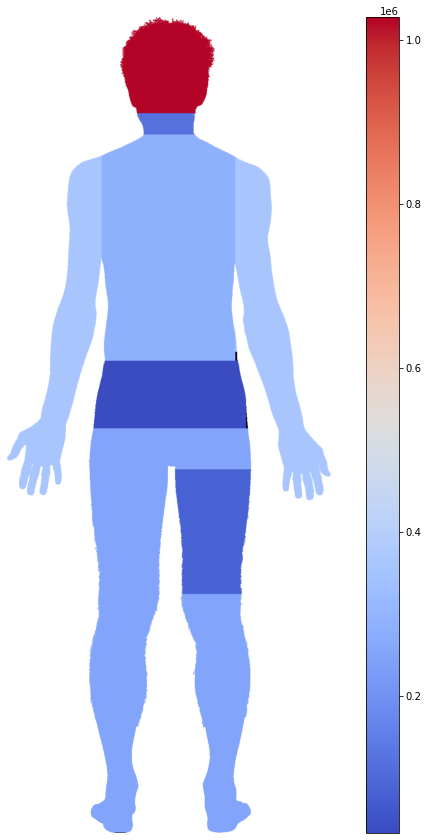

In [44]:
ax = BodyMap().generate(areas=body_counts.index,values=body_counts.values,cmap='coolwarm',background='white')
plt.show()